# Synchornize video to pycontrol

In [31]:
import cv2
import matplotlib.pylab as plt
import numpy as np
from tqdm.auto import tqdm
import pandas as pd

In [2]:
fn = '06-14-23_14-40-49.000_TT002_Rig_3_Side_recode'
videofile_path = '/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/TT002-2023-06-14-144112/video/'
videofile = videofile_path +f'{fn}.mp4'

179998


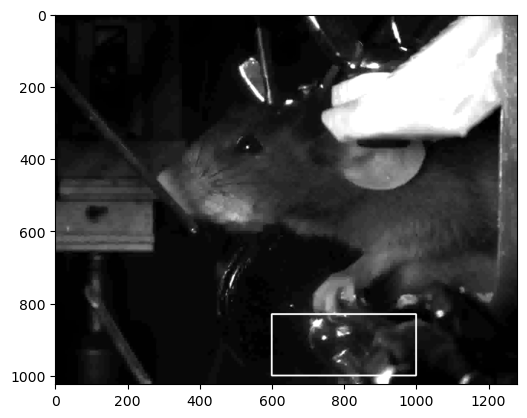

In [4]:
video = cv2.VideoCapture(videofile)
video_length = int(video.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
print(video_length)
success, image = video.read()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.rectangle(image, (600,1000), (1000,830),color=(255,255,255),thickness=3)
plt.imshow(image, cmap='gray')

In [6]:
video = cv2.VideoCapture(videofile)
frames = np.zeros((video_length,1024,1280),dtype=np.uint8)
success, image = video.read()

for i in tqdm(range(video_length)):

    # image = cv2.rectangle(image, (600,1000), (1000,830),color=(255,255,255))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # crop = np.sum(image[600:1000,830:1000])
    frames[i,:,:]= image
    success, image = video.read()

    

  0%|          | 0/179998 [00:00<?, ?it/s]

In [9]:
frames[:, 600:1000,830:1000]

array([[[52, 52, 58, ..., 71, 72, 73],
        [53, 55, 59, ..., 71, 71, 71],
        [54, 57, 60, ..., 69, 69, 69],
        ...,
        [69, 73, 80, ...,  1,  1,  1],
        [71, 71, 90, ...,  0,  0,  0],
        [72, 73, 94, ...,  0,  0,  0]],

       [[55, 55, 55, ..., 72, 73, 75],
        [55, 57, 57, ..., 71, 73, 75],
        [57, 58, 59, ..., 69, 72, 74],
        ...,
        [69, 73, 80, ...,  1,  1,  1],
        [71, 71, 90, ...,  0,  0,  0],
        [72, 73, 94, ...,  0,  0,  0]],

       [[53, 54, 57, ..., 71, 73, 74],
        [54, 54, 57, ..., 69, 72, 74],
        [55, 57, 59, ..., 68, 71, 73],
        ...,
        [71, 75, 80, ...,  1,  1,  1],
        [69, 76, 90, ...,  0,  0,  0],
        [71, 79, 94, ...,  0,  0,  0]],

       ...,

       [[43, 43, 41, ..., 69, 67, 64],
        [44, 44, 43, ..., 67, 65, 61],
        [46, 46, 46, ..., 66, 65, 60],
        ...,
        [64, 65, 64, ...,  0,  0,  0],
        [65, 66, 67, ...,  0,  0,  0],
        [62, 69, 72, ...,  0,  0

In [10]:
x = frames[:, 600:1000,830:1000].reshape(video_length,-1)

In [11]:
xsum = x.sum(axis=1)

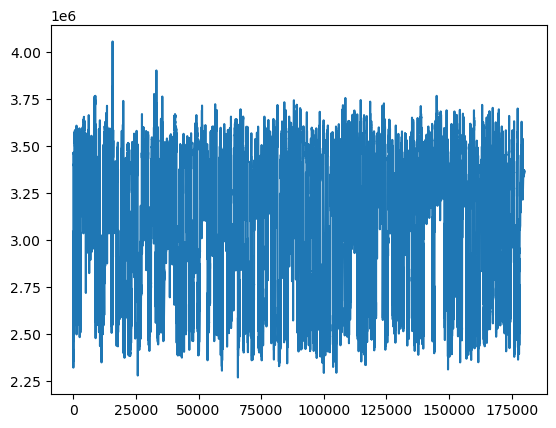

In [13]:
plt.plot(xsum)

(0.0, 6000.0)

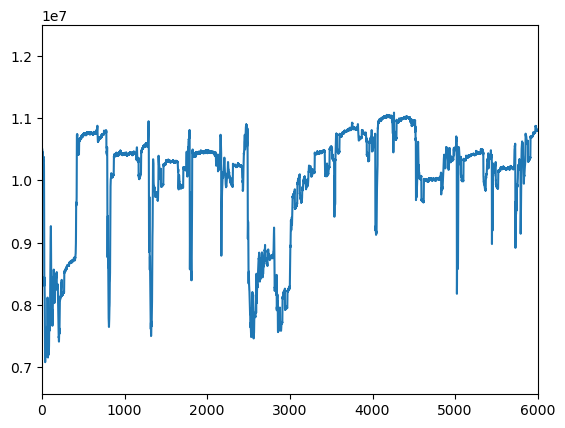

In [33]:
plt.plot(frames)
plt.xlim([0,100*60])

In [22]:
np.sum(image[600:1000,830:1000])

NameError: name 'np' is not defined

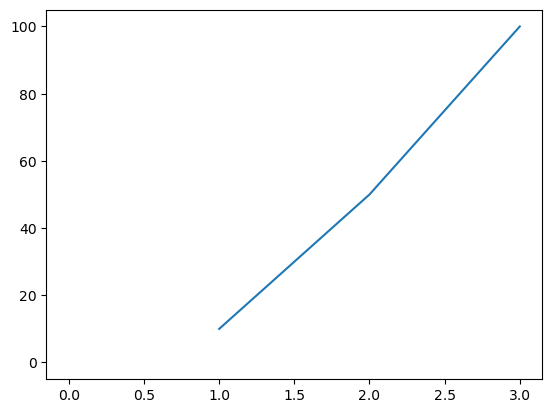

In [6]:
import matplotlib.pyplot as plt
import matplotlib.widgets as mwidgets
fig, ax = plt.subplots()
ax.plot([1, 2, 3], [10, 50, 100])
def onselect(eclick, erelease):
    print(eclick.xdata, eclick.ydata)
    print(erelease.xdata, erelease.ydata)
props = dict(facecolor='blue', alpha=0.5)
rect = mwidgets.RectangleSelector(ax, onselect, interactive=True,
                                  props=props)
fig.show()
rect.add_state('square')

In [15]:
# load pycontrol
videofile_path = '/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/TT002-2023-06-14-144112/'
df_pycontrol = pd.read_pickle(videofile_path +'processed/df_pycontrol.pkl')

In [17]:
rsync = df_pycontrol[df_pycontrol.name=='rsync']

(0.0, 60.0)

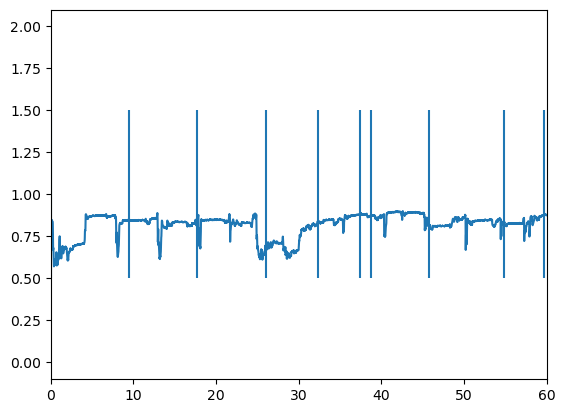

In [25]:
plt.eventplot(rsync.time/1000)
plt.plot(np.arange(len(xsum))/100, xsum/xsum.max())
plt.xlim([0,60])

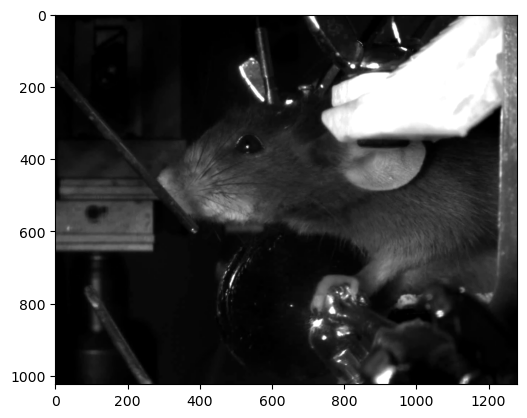

In [37]:
plt.imshow(frames[int(9440/10),:,:],cmap='gray')

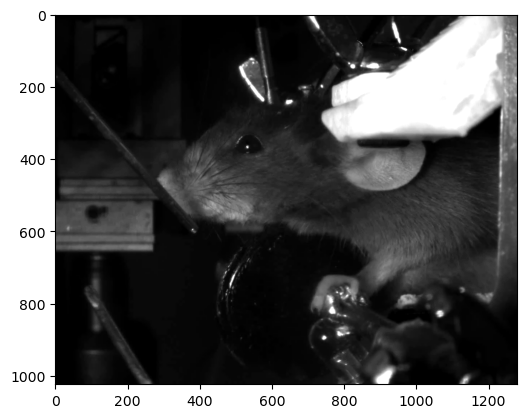

In [41]:
plt.imshow(frames[int(9600/10),:,:],cmap='gray')

In [47]:


ts = extract_video_timestamp(videofile)


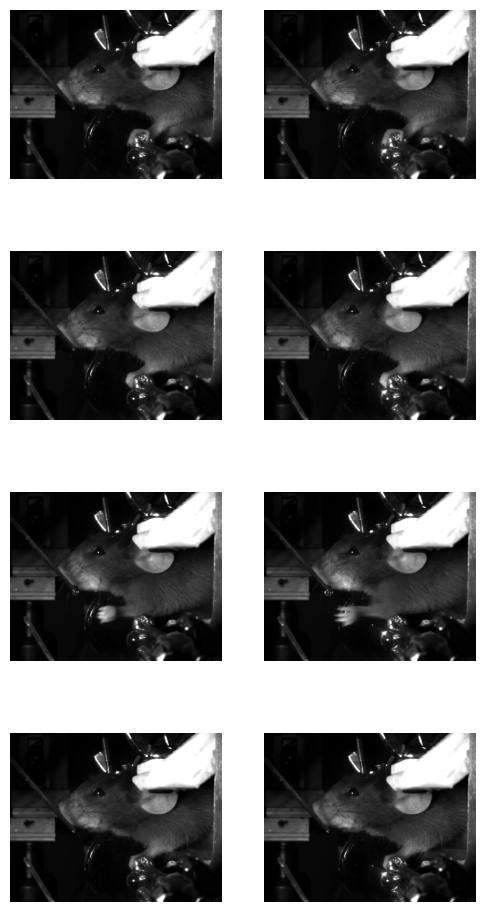

In [64]:
#checking the rsync point
rsync_time = rsync.time.values

def plot_rsync(rsync_time):
    # rsync_time: timestamp in ms of the rsync signal
    plot_num = 4
    fps = 100

    fig,ax = plt.subplots(plot_num,2,figsize=(3*2,3*plot_num))

    sync_time = rsync_time[1:plot_num+1]

    for i,t in enumerate(sync_time):
        sync_pt = int(t/1000*fps)


        ax[i][0].imshow(frames[sync_pt-1,:,:],cmap='gray')
        ax[i][1].imshow(frames[sync_pt+1,:,:],cmap='gray')

        ax[i][0].axis('off')
        ax[i][1].axis('off')
        
plot_rsync(rsync_time)